##Nama: Achmad Rachmandika Rizky Pratama
##Kelas: 3A
##NIM: 2041720125

Tugas

Modifikasi model CNN pada praktikum 2 sehingga didapatkan akurasi testing lebih dari 80%.
Buatlah model CNN untuk klasifikasi dataset MNIST.

Import Library yang dibutuhkan

In [1]:
from tensorflow.keras.datasets import cifar10
import numpy as np
import pandas as pd
import pickle
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import utils
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, Dropout, MaxPooling2D, GlobalAveragePooling2D, Activation, BatchNormalization
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import regularizers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
from PIL import Image

Memuat dataset CIFAR 1O

In [2]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()
print('Training set shape:', X_train.shape)
print('Test set shape:', X_test.shape)

170498071/170498071 [==============================] - 2s 0us/step
Training set shape: (50000, 32, 32, 3)
Test set shape: (10000, 32, 32, 3)


 Normalisasi data dan konversi label ke vektor one-hot encoded

In [3]:
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0
num_classes = 10
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

Memisahkan data latih menjadi data latih dan data validasi

In [4]:
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

Mendefinisikan model Convolutional Neural Network (CNN)

In [5]:
def cnn_model():
    model = Sequential()
    # First Conv layer
    model.add(Conv2D(filters=128, kernel_size=(3,3), activation='relu', padding='same', kernel_regularizer=regularizers.l2(1e-4), input_shape=(32,32,3)))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Dropout(0.3))

    # Second Conv layer
    model.add(Conv2D(filters=256, kernel_size=(3,3), activation='relu', padding='same', kernel_regularizer=regularizers.l2(1e-4)))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Dropout(0.3))

    # Third, fourth, fifth convolution layer
    model.add(Conv2D(filters=512, kernel_size=(3,3), activation='relu', padding='same', kernel_regularizer=regularizers.l2(1e-4)))
    model.add(Conv2D(filters=512, kernel_size=(3,3), activation='relu', padding='same', kernel_regularizer=regularizers.l2(1e-4)))
    model.add(Conv2D(filters=256, kernel_size=(3,3), activation='relu', padding='same', kernel_regularizer=regularizers.l2(1e-4)))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Dropout(0.3))

    # Fully Connected layers
    model.add(Flatten())

    model.add(Dense(512, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(256, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(0.5))

    model.add(Dense(10, activation='softmax'))

    model.summary()
    return model

 Membuat objek ImageDataGenerator dan mempersiapkan augmentasi data

In [6]:
datagen = ImageDataGenerator(
    featurewise_center=False,
    samplewise_center=False,
    featurewise_std_normalization=False,
    samplewise_std_normalization=False,
    zca_whitening=False,
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
    vertical_flip=False
)
datagen.fit(X_train)

 Membuat model dan mengompilasi

In [7]:
model = cnn_model()
model.compile(
    loss='categorical_crossentropy',
    optimizer=Adam(learning_rate=0.0003),
    metrics=['accuracy']
)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 128)       3584      
                                                                 
 max_pooling2d (MaxPooling2  (None, 16, 16, 128)       0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 16, 16, 128)       0         
                                                                 
 conv2d_1 (Conv2D)           (None, 16, 16, 256)       295168    
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 8, 8, 256)         0         
 g2D)                                                            
                                                                 
 dropout_1 (Dropout)         (None, 8, 8, 256)         0

Melatih model dengan ImageDataGenerator

In [8]:
history = model.fit(
    datagen.flow(X_train, y_train, batch_size=64),
    steps_per_epoch=len(X_train) // 64,
    epochs=50,
    validation_data=(X_valid, y_valid),
    verbose=1
)

Epoch 1/50
625/625 [==============================] - 46s 52ms/step - loss: 2.1531 - accuracy: 0.1832 - val_loss: 1.8458 - val_accuracy: 0.3202
Epoch 2/50
625/625 [==============================] - 32s 51ms/step - loss: 1.7729 - accuracy: 0.3314 - val_loss: 1.5824 - val_accuracy: 0.4239
Epoch 3/50
625/625 [==============================] - 32s 51ms/step - loss: 1.5691 - accuracy: 0.4287 - val_loss: 1.3310 - val_accuracy: 0.5150
Epoch 4/50
625/625 [==============================] - 31s 49ms/step - loss: 1.4321 - accuracy: 0.4983 - val_loss: 1.3712 - val_accuracy: 0.5369
Epoch 5/50
625/625 [==============================] - 31s 50ms/step - loss: 1.3187 - accuracy: 0.5439 - val_loss: 1.0975 - val_accuracy: 0.6212
Epoch 6/50
625/625 [==============================] - 34s 55ms/step - loss: 1.2434 - accuracy: 0.5805 - val_loss: 1.0782 - val_accuracy: 0.6337
Epoch 7/50
625/625 [==============================] - 33s 53ms/step - loss: 1.1766 - accuracy: 0.6099 - val_loss: 0.9876 - val_accuracy:

Mengevaluasi model pada set tes

In [9]:
scores = model.evaluate(X_test, y_test)

313/313 [==============================] - 2s 6ms/step - loss: 0.7144 - accuracy: 0.8232


Melakukan prediksi

<Axes: >

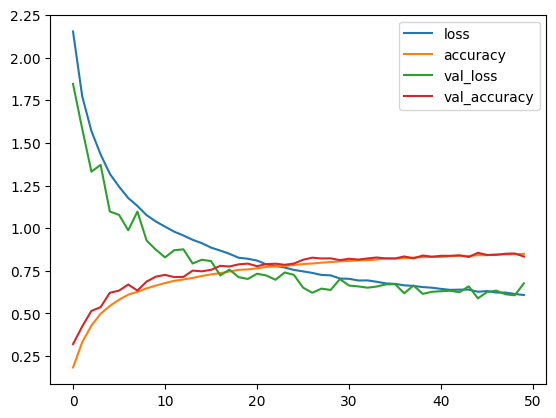

In [10]:
pd.DataFrame(history.history).plot()

Tampilkan laporan klasifikasi

In [11]:
scores = model.evaluate(X_test, y_test)
pred = model.predict(X_test)
labels = ['Airplane', 'Automobile', 'Bird', 'Cat', 'Deer', 'Dog', 'Frog', 'Horse', 'Ship', 'Truck']
y_pred = np.argmax(pred, axis=1)
y_true = np.argmax(y_test, axis=1)
errors = y_pred - y_true != 0
print(classification_report(y_true, y_pred))

313/313 [==============================] - 2s 4ms/step
              precision    recall  f1-score   support

           0       0.85      0.86      0.85      1000
           1       0.89      0.95      0.92      1000
           2       0.82      0.73      0.77      1000
           3       0.78      0.55      0.65      1000
           4       0.84      0.79      0.81      1000
           5       0.81      0.68      0.74      1000
           6       0.69      0.96      0.80      1000
           7       0.80      0.91      0.86      1000
           8       0.95      0.87      0.91      1000
           9       0.85      0.92      0.88      1000

    accuracy                           0.82     10000
   macro avg       0.83      0.82      0.82     10000
weighted avg       0.83      0.82      0.82     10000



Menampilkan visualisasi hasil prediksi

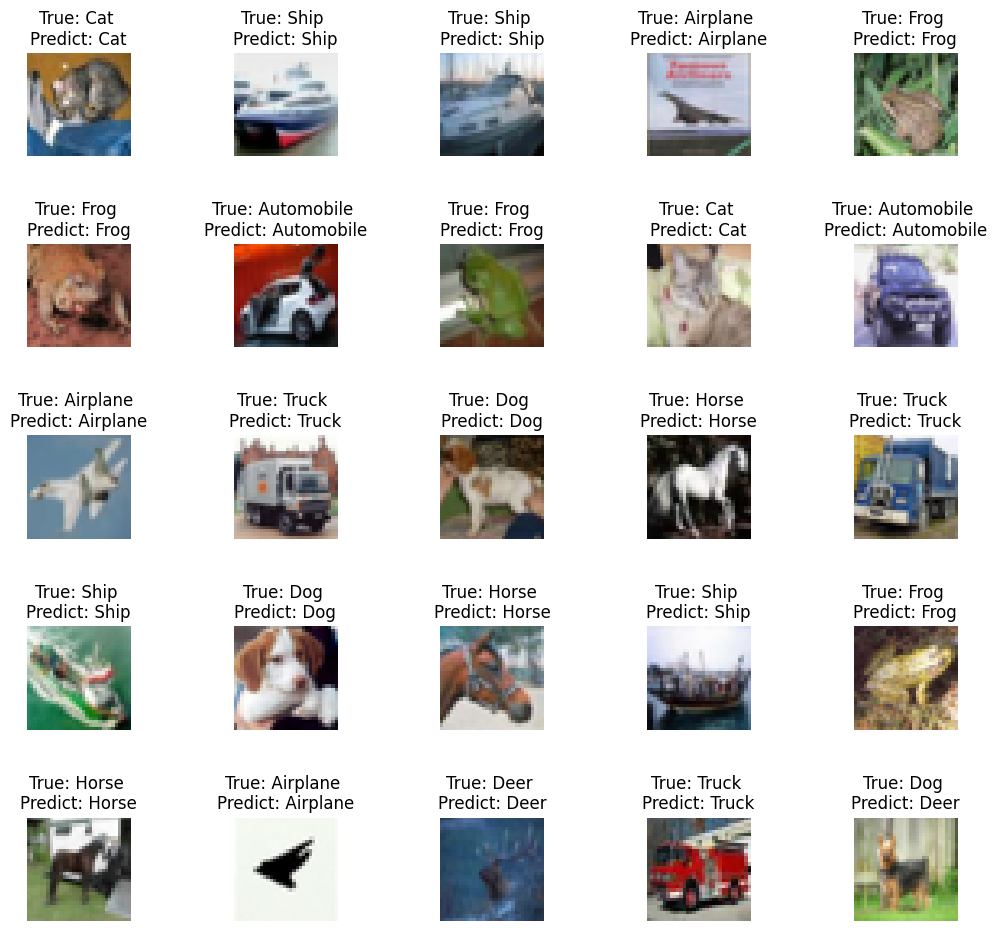

In [12]:
fig, axes = plt.subplots(5, 5, figsize=(12,12))
axes = axes.ravel()
for i in np.arange(25):
    axes[i].imshow(X_test[i])
    axes[i].set_title('True: %s \nPredict: %s' % (labels[y_true[i]], labels[y_pred[i]]))
    axes[i].axis('off')
    plt.subplots_adjust(wspace=1)

##Buatlah model CNN untuk klasifikasi dataset MNIST


Memuat Dataset MNIST

In [13]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist

# Memuat dataset MNIST
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


Normalisasi Gambar ke Rentang [0, 1]

In [14]:
# Normalisasi gambar ke rentang [0, 1]
train_images, test_images = train_images / 255.0, test_images / 255.0

Mengonversi Label ke Format One-Hot Encoding

In [15]:
# Perbaikan: Mengimpor to_categorical dari tensorflow.keras.utils
from tensorflow.keras.utils import to_categorical

# Mengonversi label ke format one-hot encoding
train_labels = to_categorical(train_labels, num_classes=10)
test_labels = to_categorical(test_labels, num_classes=10)

Menampilkan Informasi tentang Dataset

In [16]:
# Menampilkan informasi tentang dataset
print("Jumlah data latihan:", len(train_images))
print("Jumlah data pengujian:", len(test_images))
print("Ukuran gambar:", train_images[0].shape)

Jumlah data latihan: 60000
Jumlah data pengujian: 10000
Ukuran gambar: (28, 28)


Membangun Model

In [17]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# Membangun model
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28,28,1)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(10, activation='softmax'))

Mengompilasi Model

In [18]:
# Mengompilasi model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

Menampilkan Ringkasan Model

In [19]:
# Menampilkan ringkasan model
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 13, 13, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_6 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 flatten_1 (Flatten)         (None, 1600)              0         
                                                                 
 dense_4 (Dense)             (None, 128)              

Melatih Model

In [20]:
# Melatih model
history = model.fit(train_images, train_labels, epochs=10, batch_size=128, verbose=2, validation_split=0.3)

Epoch 1/10
329/329 - 7s - loss: 0.3643 - accuracy: 0.8845 - val_loss: 0.0888 - val_accuracy: 0.9726 - 7s/epoch - 20ms/step
Epoch 2/10
329/329 - 2s - loss: 0.0983 - accuracy: 0.9705 - val_loss: 0.0621 - val_accuracy: 0.9807 - 2s/epoch - 5ms/step
Epoch 3/10
329/329 - 2s - loss: 0.0711 - accuracy: 0.9788 - val_loss: 0.0573 - val_accuracy: 0.9834 - 2s/epoch - 5ms/step
Epoch 4/10
329/329 - 2s - loss: 0.0563 - accuracy: 0.9833 - val_loss: 0.0461 - val_accuracy: 0.9865 - 2s/epoch - 5ms/step
Epoch 5/10
329/329 - 2s - loss: 0.0447 - accuracy: 0.9863 - val_loss: 0.0426 - val_accuracy: 0.9871 - 2s/epoch - 6ms/step
Epoch 6/10
329/329 - 2s - loss: 0.0372 - accuracy: 0.9888 - val_loss: 0.0526 - val_accuracy: 0.9855 - 2s/epoch - 7ms/step
Epoch 7/10
329/329 - 2s - loss: 0.0362 - accuracy: 0.9887 - val_loss: 0.0452 - val_accuracy: 0.9877 - 2s/epoch - 5ms/step
Epoch 8/10
329/329 - 2s - loss: 0.0269 - accuracy: 0.9913 - val_loss: 0.0420 - val_accuracy: 0.9886 - 2s/epoch - 6ms/step
Epoch 9/10
329/329 - 2s

 Plot Sejarah Pelatihan

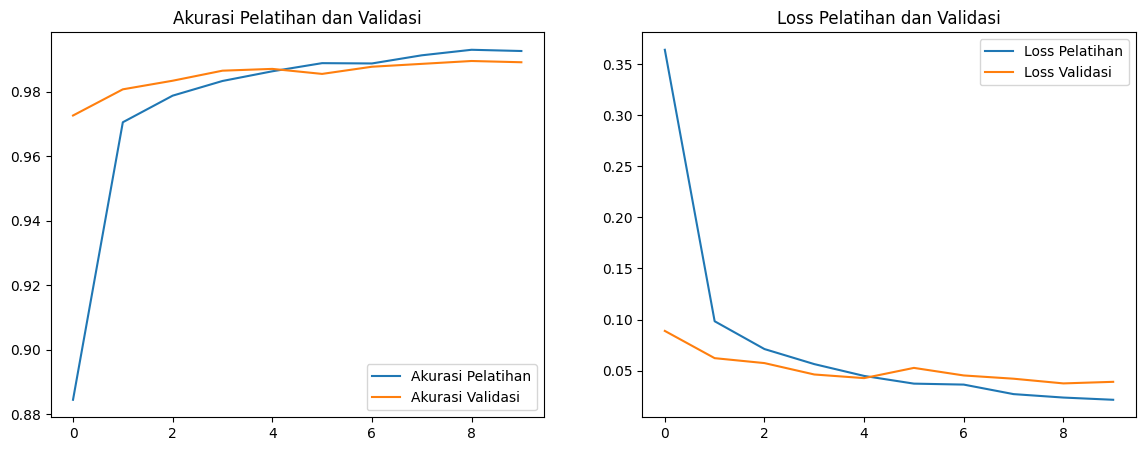

In [21]:
import matplotlib.pyplot as plt

# Plot sejarah pelatihan
plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Akurasi Pelatihan')
plt.plot(history.history['val_accuracy'], label='Akurasi Validasi')
plt.legend(loc='lower right')
plt.title('Akurasi Pelatihan dan Validasi')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Loss Pelatihan')
plt.plot(history.history['val_loss'], label='Loss Validasi')
plt.legend(loc='upper right')
plt.title('Loss Pelatihan dan Validasi')

plt.show()

 Evaluasi Model pada Kumpulan Data Uji

In [22]:
# Evaluasi model pada kumpulan data uji
validation_loss, validation_accuracy = model.evaluate(test_images, test_labels, verbose=False)
print("Loss Validasi:", validation_loss)
print("Akurasi Validasi:", validation_accuracy)

Loss Validasi: 0.03223389759659767
Akurasi Validasi: 0.9902999997138977


Menghasilkan Nilai Prediksi pada Kumpulan Data Uji

In [23]:
# Menghasilkan nilai prediksi pada kumpulan data uji
y_pred_enc = model.predict(test_images)

313/313 [==============================] - 1s 2ms/step


Mendekode Nilai Prediksi

In [24]:
# Mendekode nilai prediksi
y_pred = [np.argmax(i) for i in y_pred_enc]

Menampilkan Laporan Klasifikasi

In [25]:
# Menampilkan laporan klasifikasi
print(classification_report(np.argmax(test_labels, axis=1), y_pred))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       980
           1       0.99      1.00      1.00      1135
           2       1.00      0.99      0.99      1032
           3       0.99      0.99      0.99      1010
           4       0.99      0.99      0.99       982
           5       0.98      0.98      0.98       892
           6       0.99      0.99      0.99       958
           7       0.98      1.00      0.99      1028
           8       1.00      0.98      0.99       974
           9       0.99      0.98      0.99      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



Membuat Matriks Konfusi dan Menampilkannya dengan Heatmap

Text(58.222222222222214, 0.5, 'Aktual')

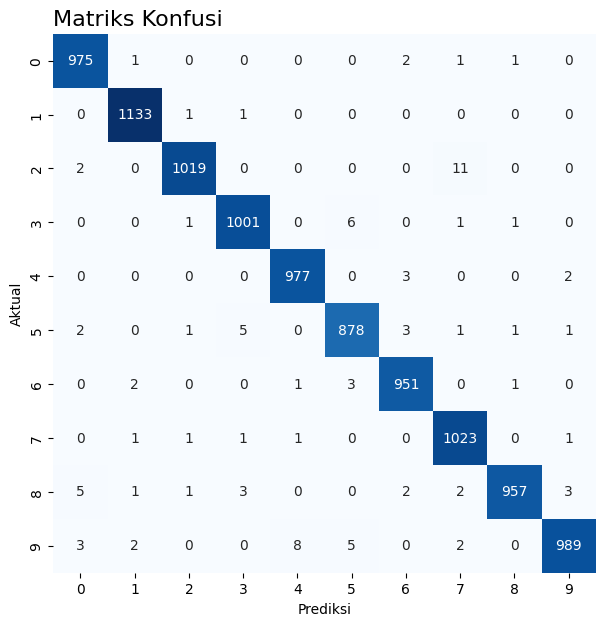

In [26]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Membuat matriks konfusi dan menampilkannya dengan heatmap
fig, ax = plt.subplots(figsize=(7, 7))
sns.heatmap(confusion_matrix(np.argmax(test_labels, axis=1), y_pred), annot=True, cbar=False, fmt='1d', cmap='Blues', ax=ax)
ax.set_title('Matriks Konfusi', loc='left', fontsize=16)
ax.set_xlabel('Prediksi')
ax.set_ylabel('Aktual')

Menampilkan Target yang Diprediksi pada Setiap Gambar (Label di atas gambar adalah label yang diprediksi)

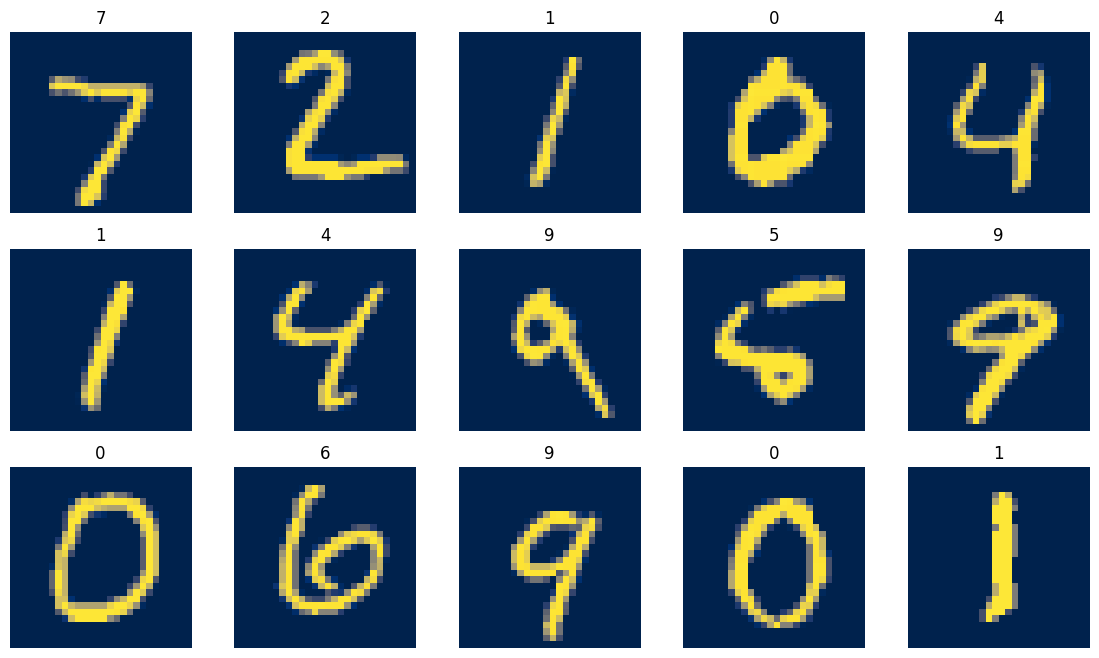

In [27]:
# Menampilkan target yang diprediksi pada setiap gambar
# (label di atas gambar adalah label yang diprediksi)
plt.figure(figsize=(14, 8))
for ind, row in enumerate(test_images[:15]):
    plt.subplot(3, 5, ind+1)
    plt.title(y_pred[ind])
    img = row.reshape(28, 28)
    plt.axis('off')
    plt.imshow(img, cmap='cividis')